In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
region     1000 non-null int64
tenure     1000 non-null int64
age        1000 non-null int64
marital    1000 non-null int64
address    1000 non-null int64
income     1000 non-null float64
ed         1000 non-null int64
employ     1000 non-null int64
retire     1000 non-null float64
gender     1000 non-null int64
reside     1000 non-null int64
custcat    1000 non-null int64
dtypes: float64(2), int64(10)
memory usage: 93.8 KB


In [5]:
df.corr()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
region,1.000000,0.016388,0.015034,-0.080637,0.010320,0.023765,-0.057952,0.016335,0.005595,0.050596,-0.065158,-0.023771
tenure,0.016388,1.000000,0.490217,0.154171,0.522952,0.242912,-0.109797,0.520288,0.171143,0.023533,-0.036592,0.166691
age,0.015034,0.490217,1.000000,-0.014433,0.660435,0.327948,-0.154857,0.670047,0.429440,-0.011419,-0.254993,0.056909
marital,-0.080637,0.154171,-0.014433,1.000000,-0.012051,-0.043984,0.001400,-0.002891,-0.078109,0.008345,0.625999,0.083836
address,0.010320,0.522952,0.660435,-0.012051,1.000000,0.226781,-0.128330,0.463291,0.292503,0.008363,-0.201645,0.067913
income,0.023765,0.242912,0.327948,-0.043984,0.226781,1.000000,0.113939,0.516349,-0.083651,0.038706,-0.097591,0.134525
ed,-0.057952,-0.109797,-0.154857,0.001400,-0.128330,0.113939,1.000000,-0.228580,-0.114229,0.006704,0.021045,0.193864
employ,0.016335,0.520288,0.670047,-0.002891,0.463291,0.516349,-0.228580,1.000000,0.277401,0.046016,-0.134683,0.110011
retire,0.005595,0.171143,0.429440,-0.078109,0.292503,-0.083651,-0.114229,0.277401,1.000000,0.053906,-0.140120,0.008908
gender,0.050596,0.023533,-0.011419,0.008345,0.008363,0.038706,0.006704,0.046016,0.053906,1.000000,0.016556,-0.004966


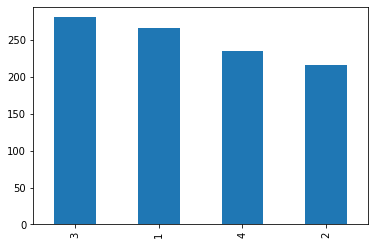

In [6]:
df['custcat'].value_counts().plot.bar()

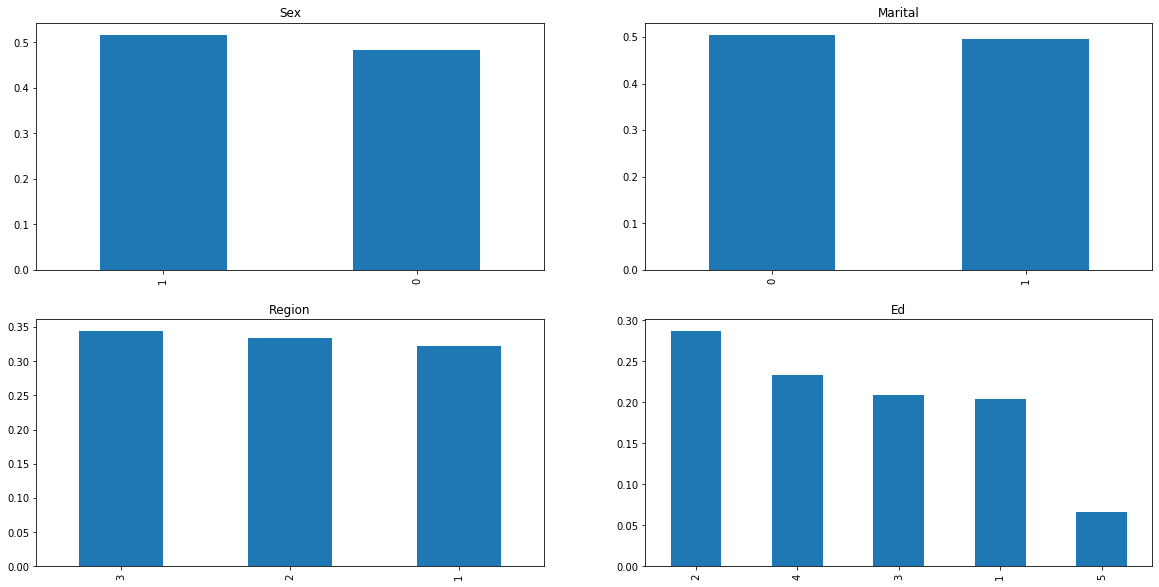

In [7]:
plt.figure(1)
plt.subplot(221)
df['gender'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = 'Sex')
plt.subplot(222)
df['marital'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = 'Marital')
plt.subplot(223)
df['region'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = 'Region')
plt.subplot(224)
df['ed'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = 'Ed')

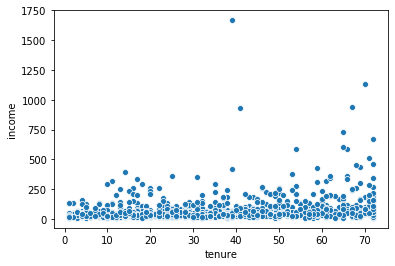

In [8]:
sns.scatterplot(x = 'tenure',y = 'income',data = df)

In [9]:
train_set = df.drop(['custcat','retire','gender','region','age'],axis = 1)
test_set = df['custcat']

In [10]:
train_set.head()

,tenure,marital,address,income,ed,employ,reside
0,13,1,9,64.0,4,5,2
1,11,1,7,136.0,5,5,6
2,68,1,24,116.0,1,29,2
3,33,0,12,33.0,2,0,1
4,23,1,9,30.0,1,2,4


In [11]:
train_set = StandardScaler().fit(train_set).transform(train_set.astype(float))

In [12]:
train_set

array([[-1.055125  ,  1.0100505 , -0.25303431, ...,  1.0877526 ,
        -0.5941226 , -0.23065004],
       [-1.14880563,  1.0100505 , -0.4514148 , ...,  1.9062271 ,
        -0.5941226 ,  2.55666158],
       [ 1.52109247,  1.0100505 ,  1.23481934, ..., -1.36767088,
         1.78752803, -0.23065004],
       ...,
       [ 1.47425216, -0.9900495 ,  2.82186323, ...,  1.9062271 ,
         2.18446981, -0.92747794],
       [ 1.61477311, -0.9900495 ,  0.63967788, ..., -0.54919639,
         1.09287993, -0.92747794],
       [ 0.67796676,  1.0100505 , -0.4514148 , ...,  0.26927811,
        -0.79259348,  0.46617787]])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(train_set,test_set,test_size = 0.2, random_state = 2)

In [14]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 7), (800,), (200, 7), (200,))

In [15]:
model = KNeighborsClassifier(n_neighbors = 4)
model.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [16]:
y_pred = model.predict(x_test)

In [17]:
score = accuracy_score(y_test, y_pred)
score

0.31

In [31]:
k = 10
mean_acc = np.zeros((k-1))
std_acc = np.zeros((k-1))
confusion_matrrix = []

for i in range(1,k):
    model = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    y_predict = model.predict(x_test)
    mean_acc[i-1] = accuracy_score(y_test, y_predict)
    std_acc[i-1] = np.std(y_predict==y_test)/np.sqrt(y_predict.shape[0])
print(f"mean_accuracy is : {mean_acc}\nstd_accuracy is : {std_acc}")

mean_accuracy is : [0.29  0.28  0.305 0.31  0.3   0.305 0.28  0.29  0.27 ]
std_accuracy is : [0.03208582 0.03174902 0.03255572 0.03270321 0.0324037  0.03255572
 0.03174902 0.03208582 0.03139267]


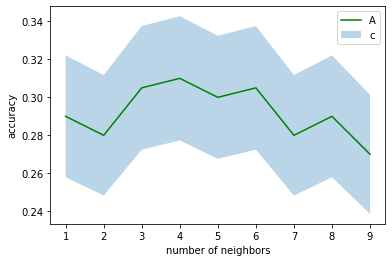

In [37]:
plt.plot(range(1,k),mean_acc, 'g')
plt.fill_between(range(1,k),mean_acc-1*std_acc,mean_acc+1*std_acc, alpha = 0.3)
plt.legend('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('number of neighbors')
plt.show()